In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/highschoolData/FirstExam_Results_with_gender_soliman.csv
/kaggle/input/highschoolData/SecondExam_Results_with_gender.csv


In [3]:
import numpy as np
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
firstexamDf= pd.read_csv('../input/highschoolData/FirstExam_Results_with_gender_soliman.csv')
secondexamDf= pd.read_csv('../input/highschoolData/SecondExam_Results_with_gender.csv')

In [5]:
firstexamDf= firstexamDf.drop(['schoolName_English','religion','altarbiat_alwatania','economics_statistics'],axis=1)
secondexamDf= secondexamDf.drop(['schoolName_English','religion','altarbiat_alwatania','economics_statistics'],axis=1)
firstexamDf= firstexamDf.drop(['administration_English'],axis=1)

In [6]:
sortdf = firstexamDf.groupby('government_English')
sortdf.head(5)

,desk_no,name,schoolName_Arabic,administration_Arabic,government_Arabic,government_English,branch,Percentage,student_type,status,...,geography,philosophy,psychology,chemistry,biology,geology,applied_math,physics,total,gender
0,102300,احمد محمد احمد محمود ابوالقاسم,مدارس النيل المصريه بنين,أكتوبر,الجيزة,Giza,undefined,0%,Other qualities,successful,...,unscheduled,unscheduled,unscheduled,unscheduled,unscheduled,unscheduled,unscheduled,unscheduled,0.0,M
1,102301,احمد محمد عبدالصادق سلامه,مدارس النيل المصريه بنين,أكتوبر,الجيزة,Giza,undefined,0%,Other qualities,successful,...,unscheduled,unscheduled,unscheduled,unscheduled,unscheduled,unscheduled,unscheduled,unscheduled,0.0,M
2,102302,ادهم اشرف عبدالهادي معاذ,مدارس النيل المصريه بنين,أكتوبر,الجيزة,Giza,undefined,0%,Other qualities,successful,...,unscheduled,unscheduled,unscheduled,unscheduled,unscheduled,unscheduled,unscheduled,unscheduled,0.0,M
3,102303,بيير جون نبيل غالي سعد,مدارس النيل المصريه بنين,أكتوبر,الجيزة,Giza,undefined,0%,Other qualities,successful,...,unscheduled,unscheduled,unscheduled,unscheduled,unscheduled,unscheduled,unscheduled,unscheduled,0.0,M
4,102304,رامي محمود عبدالمنعم شحاته,مدارس النيل المصريه بنين,أكتوبر,الجيزة,Giza,undefined,0%,Other qualities,successful,...,unscheduled,unscheduled,unscheduled,unscheduled,unscheduled,unscheduled,unscheduled,unscheduled,0.0,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
577390,800820,أمل أحمد مختار أحمد عبد الله,الرسمية المتميزة للغات ثانوي,الخارجة,الوادي الجديد,Elwadi Elgadid,literary,52.44%,students,second Trail,...,30,39,32,unscheduled,unscheduled,unscheduled,unscheduled,unscheduled,215.0,F
577391,800821,اكرم احمد محمد امام,موط الرسمية لغات الثانوية المشتركة,الداخلة,الوادي الجديد,Elwadi Elgadid,science,56.34%,students,successful,...,unscheduled,unscheduled,unscheduled,30,35,32,unscheduled,37,231.0,M
577392,800822,زياد طارق احمد سيد,موط الرسمية لغات الثانوية المشتركة,الداخلة,الوادي الجديد,Elwadi Elgadid,science,64.15%,students,successful,...,unscheduled,unscheduled,unscheduled,30,45,40,unscheduled,30,263.0,M
577393,800823,محمد سيد محمد سيد,موط الرسمية لغات الثانوية المشتركة,الداخلة,الوادي الجديد,Elwadi Elgadid,science,68.54%,students,successful,...,unscheduled,unscheduled,unscheduled,30,46,43,unscheduled,35,281.0,M


In [7]:
firstexamDf.isna().sum()

desk_no                  0
name                     0
schoolName_Arabic        0
administration_Arabic    0
government_Arabic        0
government_English       0
branch                   0
Percentage               0
student_type             0
status                   0
arabic                   0
first_foreign_lang       0
second_foreign_lang      0
pure_mathematics         0
history                  0
geography                0
philosophy               0
psychology               0
chemistry                0
biology                  0
geology                  0
applied_math             0
physics                  0
total                    0
gender                   0
dtype: int64

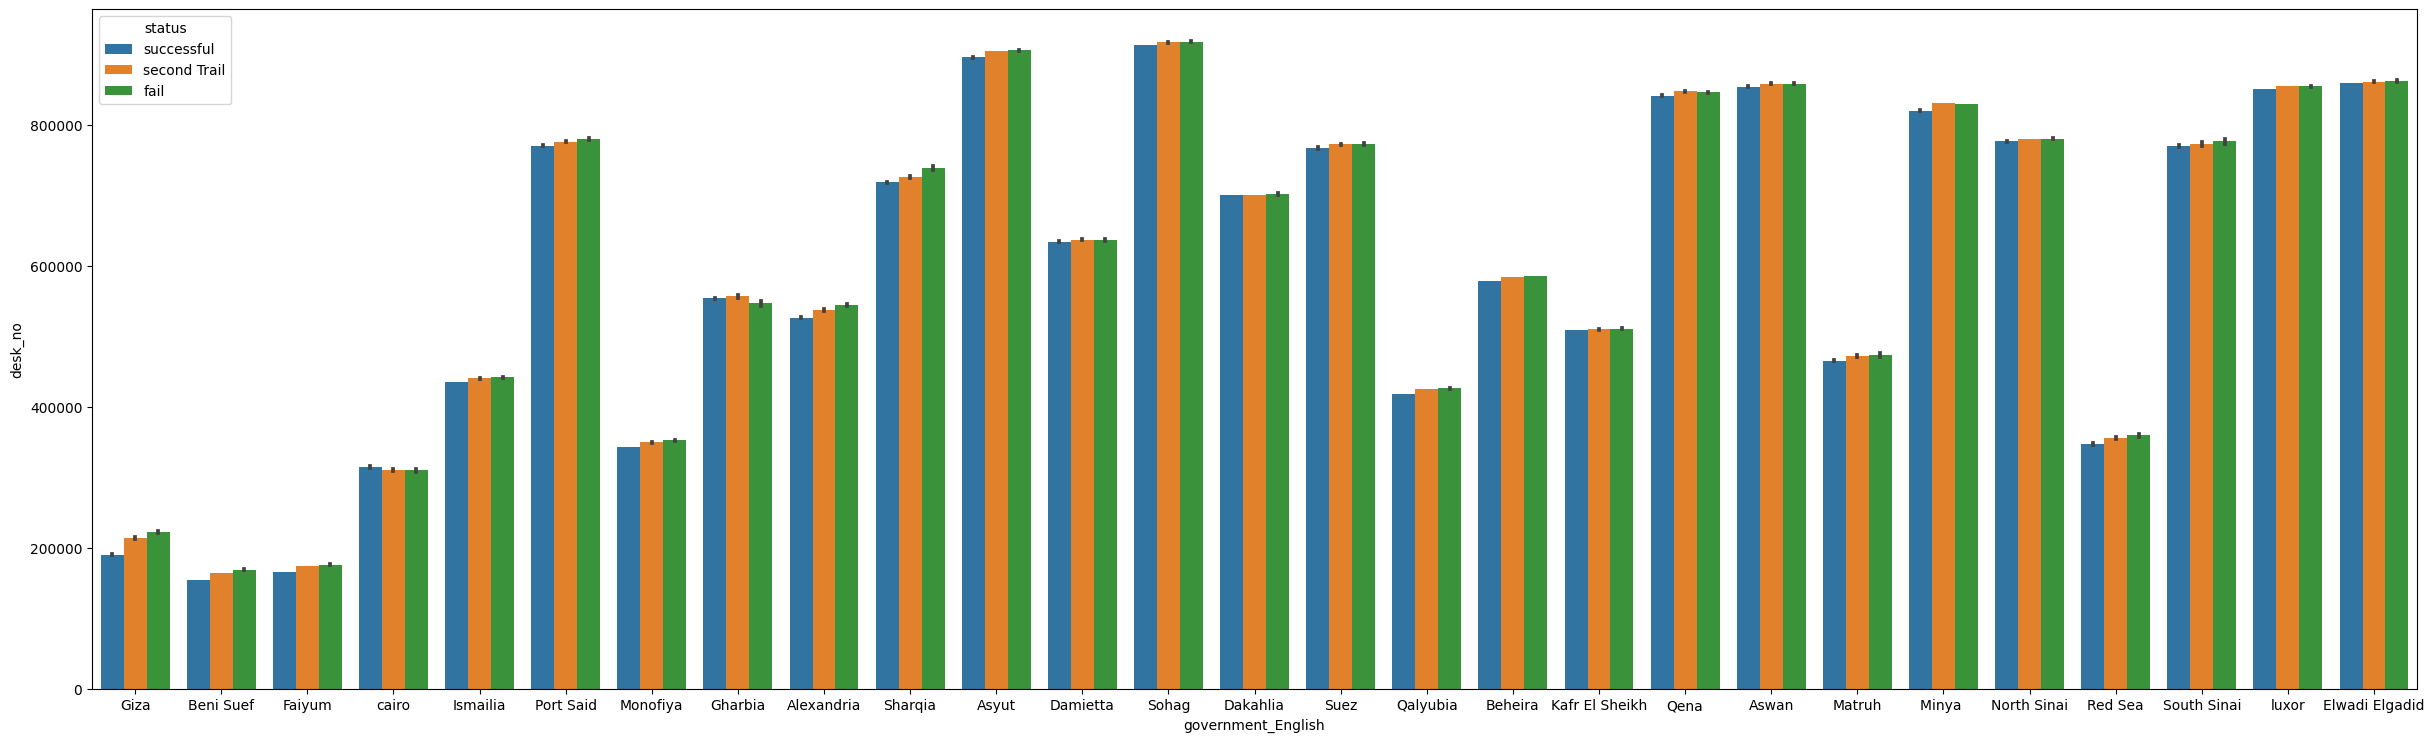

In [9]:
fig, ax = plt.subplots(figsize=(30,9), dpi=100)
no_student =firstexamDf['desk_no'].value_counts().index.tolist()
p = sns.barplot(x='government_English', y='desk_no', hue='status', data=firstexamDf, ax=ax)

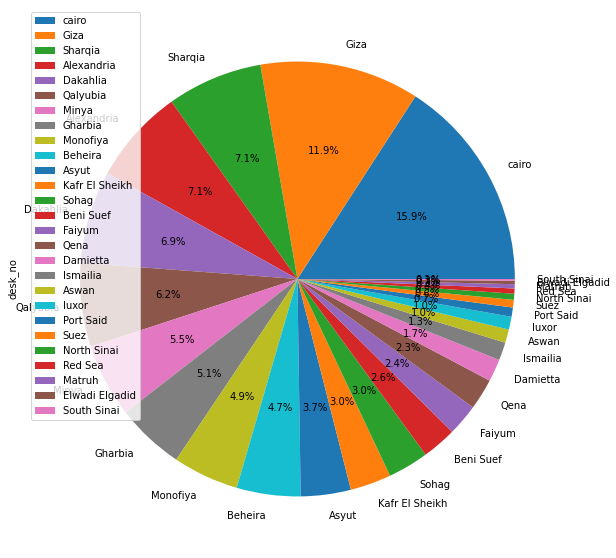

In [10]:
df1= firstexamDf.groupby('government_English')[['desk_no']].nunique().sort_values(by='desk_no',ascending=False)
df1.plot(x='government_English', y ='desk_no', kind='pie',figsize=(40,10),autopct='%1.1f%%')
plt.show()

* covert status to 0,1,2
0 fail

In [11]:
def student_status(status):
    if status=='successful':
        return 1
    if status=='fail':
        return 0
    if status=='second Trail':
        return 2
    else:
        return 3
    
firstexamDf['status_numeric'] = firstexamDf['status'].apply(student_status)

In [12]:
firstexamDf['status'].head(5)

0    successful
1    successful
2    successful
3    successful
4    successful
Name: status, dtype: object

In [13]:
literStudentsDf = firstexamDf[firstexamDf['branch']=='literary']
literStudentsDf.head(5)
scienceStudentDf = firstexamDf[firstexamDf['branch']=='science']
mathStudentDf = firstexamDf[firstexamDf['branch']=='mathematics']
nullStudentDf = firstexamDf[firstexamDf['branch']=='undefined']

In [14]:
literStudentsDf.head(5)
literStudentsDf.plot(kind='bar', x='government_English', y='status')
plt.show()

TypeError: no numeric data to plot